In [1]:
import ternary
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
landsat = pd.read_csv('remote_sensing_bands.csv')
landsat.head()

,E_utm,N_utm,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11
0,474500.000000,6816000.0,140.0,150.0,146.0,145.0,37.0,40.0,161.0,21.0,51.0,51.0
1,474575.221239,6816000.0,106.0,111.0,118.0,128.0,62.0,71.0,139.0,37.0,58.0,58.0
2,474650.442478,6816000.0,159.0,157.0,153.0,151.0,56.0,53.0,156.0,25.0,54.0,54.0
3,474725.663717,6816000.0,59.0,53.0,56.0,83.0,117.0,109.0,27.0,38.0,54.0,54.0
4,474800.884956,6816000.0,110.0,106.0,112.0,126.0,74.0,64.0,98.0,43.0,65.0,65.0


In [3]:
variables = ['B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11']

In [4]:
def plot_corr(dataframe, variables, size=10):                         # plots a graphical correlation matrix 
    corr = dataframe[variables].corr()
    fig, ax = plt.subplots(figsize=(size, size))
    im = ax.matshow(corr,vmin = -1.0, vmax = 1.0, cmap = 'magma')
    plt.xticks(range(len(corr.columns)), corr.columns, rotation = 55);
    plt.yticks(range(len(corr.columns)), corr.columns);
    plt.colorbar(im, orientation = 'vertical')
    plt.gca().set_aspect('equal')
    plt.gcf().set_size_inches(size, size-0.2*size)

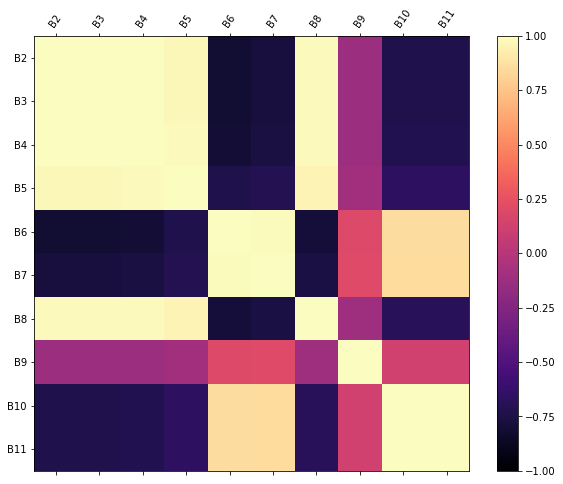

In [5]:
# using our correlation matrix visualization function
plot_corr(landsat, variables, 10) 
plt.savefig('correlation_matrix_.png', dpi = 400, bbox_inches = 'tight')

## Principal Component Analysis (PCA)

In [6]:
def compute_pca(df, variables, explained_variance='on'):

    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.decomposition import PCA
    from sklearn.preprocessing import StandardScaler
    
    X = df.loc[:, variables].values
    mu_ = np.mean(X, axis=0)
    sd_ = np.std(X, axis=0)
    scaler = StandardScaler()
    x = scaler.fit_transform(X)
    
    n_components = len(variables)
    pca = PCA(n_components=n_components, whiten=True)
    pca.fit(x)
    
    n_pcs = np.arange(1, len(variables)+1)
    pc = ['PC']*(len(variables) + 1)

    PCs = []
    for i, k in zip(pc, n_pcs):
        PCs.append(i+str(k))
        
    PC_transformed = []
    for i in range(len(variables)):
        pc_dot = np.dot(pca.transform(x)[:,:i+1], pca.components_[:i+1,:])
        pc_dot_ = sd_*pc_dot + mu_
        PC_transformed.append(pc_dot_)
    
    pcs = np.array(PC_transformed)
        
    plt.figure(figsize=(8, 8))
    plt.matshow(pca.components_,cmap='cividis', fignum=1)
    plt.colorbar()
    plt.gca().set_aspect('equal')
    plt.gcf().set_size_inches(10, 8)
    plt.yticks(range(len(variables)), PCs,fontsize=9)
    plt.xticks(range(len(variables)), variables,rotation=55,fontsize = 10, ha='left')
    plt.tight_layout()
    plt.show()
    
    if explained_variance == 'on':
        plt.figure(figsize=(8, 4))
        plt.bar(PCs,pca.explained_variance_ratio_ *100, color='orangered')
        plt.xticks(rotation = 90)
        plt.ylabel('Variance explained by component (%)')
        plt.ylim(0, 100)
        plt.grid()
    
    return pcs

/home/silva/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


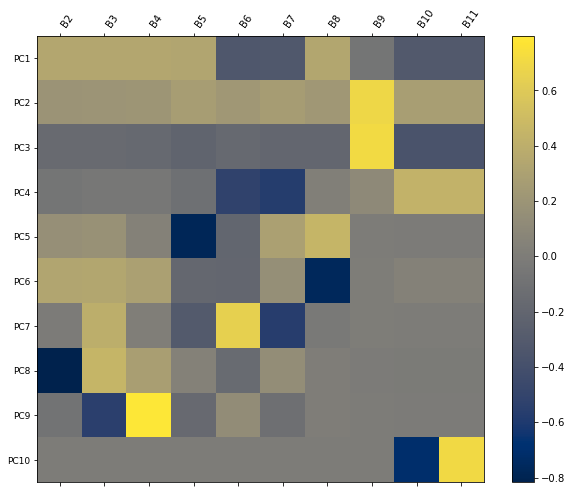

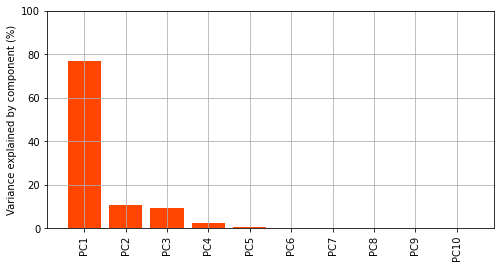

In [7]:
pcs = compute_pca(landsat, variables, explained_variance='on')

## PC's dataframe

In [8]:
def pcs_dataframe(x, y, variables, pc_number, pcs):
    
    data = {'X':x, 'Y':y}

    for i in range(len(variables)):
        data[variables[i]] = pcs[pc_number-1][:, i]

        df = pd.DataFrame(data)

    return df

In [9]:
pc_df_one = pcs_dataframe(landsat.E_utm, landsat.N_utm, variables, 1, pcs)

In [10]:
pc_df_one.head()

,X,Y,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11
0,474500.000000,6816000.0,105.101736,104.592802,106.821753,122.479879,69.251982,62.354311,100.168461,35.977730,72.967340,72.967340
1,474575.221239,6816000.0,94.930961,94.524985,97.113601,114.843823,78.468276,70.735750,90.121667,36.297889,80.414641,80.414641
2,474650.442478,6816000.0,104.778357,104.272697,106.513084,122.237091,69.545013,62.620798,99.849024,35.987910,73.204126,73.204126
3,474725.663717,6816000.0,76.600880,76.380456,79.617273,101.081890,95.078164,85.841036,72.015029,36.874889,93.836395,93.836395
4,474800.884956,6816000.0,91.641376,91.268700,93.973645,112.374055,81.449149,73.446601,86.872182,36.401440,82.823359,82.823359


In [11]:
pc_df_two = pcs_dataframe(landsat.E_utm, landsat.N_utm, variables, 2, pcs)
pc_df_two.head()

,X,Y,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11
0,474500.000000,6816000.0,97.209957,96.572676,98.691194,113.933407,60.543908,52.887388,90.950503,30.991646,63.774865,63.774865
1,474575.221239,6816000.0,96.655006,96.277069,98.889811,116.710893,80.370650,72.803903,92.135431,37.387154,82.422838,82.422838
2,474650.442478,6816000.0,103.234399,102.703629,104.922410,120.565048,67.841354,60.768677,98.045610,35.012426,71.405698,71.405698
3,474725.663717,6816000.0,69.009747,68.665864,71.796456,92.861005,86.701833,76.734765,63.148239,32.078755,84.994118,84.994118
4,474800.884956,6816000.0,96.676383,96.385594,99.160995,117.826761,87.004957,79.486561,92.753300,39.582595,88.688219,88.688219


In [12]:
pc_df_three = pcs_dataframe(landsat.E_utm, landsat.N_utm, variables, 3, pcs)
pc_df_three.head()

,X,Y,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11
0,474500.000000,6816000.0,108.066667,107.626738,109.934988,125.809888,71.993700,64.653649,104.281766,22.171873,84.770801,84.770801
1,474575.221239,6816000.0,95.824243,95.431205,98.029428,115.802097,79.494504,71.903541,91.115313,38.062049,80.816214,80.816214
2,474650.442478,6816000.0,113.925793,113.589371,115.994995,132.260686,79.116799,72.355772,111.173878,26.326952,92.081928,92.081928
3,474725.663717,6816000.0,59.966087,59.457809,62.430353,82.967873,77.164134,66.933447,52.043271,39.425643,67.504462,67.504462
4,474800.884956,6816000.0,91.535584,91.151345,93.836907,112.203086,81.583326,73.915077,86.440767,43.758877,78.746359,78.746359


## Correlation matrix

### PC1

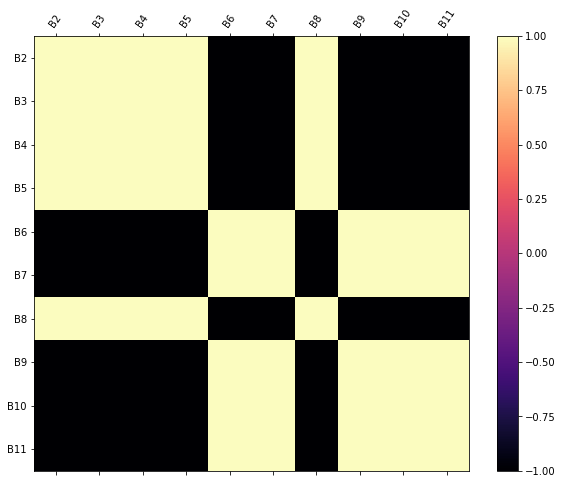

In [13]:
plot_corr(pc_df_one, variables, 10)

### PC2

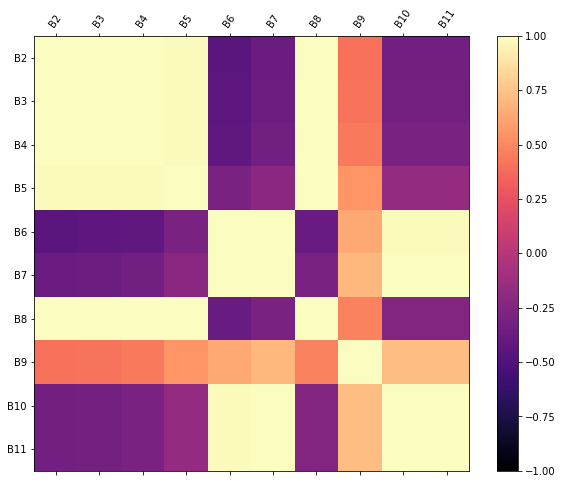

In [14]:
plot_corr(pc_df_two, variables)

### PC3

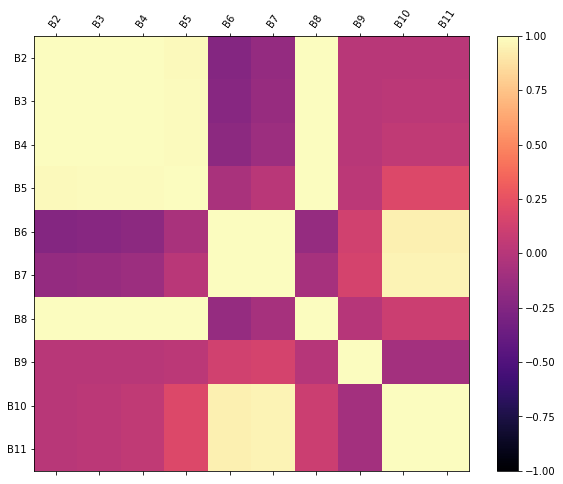

In [15]:
plot_corr(pc_df_three, variables)

### Dataframe of the three first PCs.

In [16]:
data = {'PC1':pc_df_one.B2, 'PC2':pc_df_two.B2, 'PC3':pc_df_three.B2}
pcs_df = pd.DataFrame(data)

The band **B2** presents the highest correlation coeficient in relation to the other bands, so it is a good choice to represent the PC's geral behavior.

In [17]:
# defining argume
variables_rgb = ['PC1', 'PC2', 'PC3'] # a list with the name of the variables in the RGB order;
shape = [520, 340] # the shape of your data as a list [n-values in y, n-values in x].

In [18]:
sat, extent = ternary.grid(pcs_df, variables_rgb, 
                                   shape, landsat.E_utm, landsat.N_utm, stretch=1.2)

# the first output consists of the grid (M,N 3) used to create the RGB image.
# the second output consists of the extent (coordinates) of the espacial data we intend to plot.

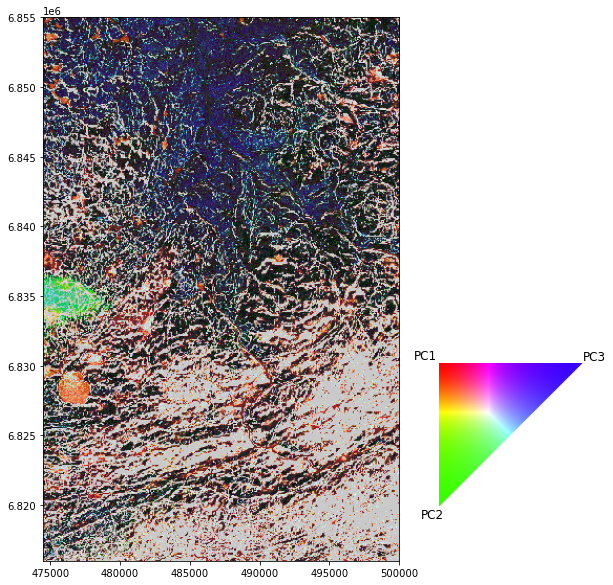

In [19]:
ternary.plot(sat[::-1], variables_rgb, extent, triangle_position=[0.7, 0.2, 0.2, 0.2])
plt.savefig('landsat_pcs_ternary_map.png', dpi = 400, bbox_inches = 'tight', transparent = False)